In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 

from   keras.datasets.cifar10 import load_data


In [2]:
(X_train,Y_train), (X_test,Y_test)=load_data()

In [3]:

print("Information about X_train:")
print("Shape:", X_train.shape)
print("Data type:", X_train.dtype)
print("Length:", len(X_train))

print("\nInformation about Y_train:")
print("Shape:", Y_train.shape)
print("Data type:", Y_train.dtype)
print("Length:", len(Y_train))

print("\nInformation about X_test:")
print("Shape:", X_test.shape)
print("Data type:", X_test.dtype)
print("Length:", len(X_test))

print("\nInformation about Y_test:")
print("Shape:", Y_test.shape)
print("Data type:", Y_test.dtype)
print("Length:", len(Y_test))

Information about X_train:
Shape: (50000, 32, 32, 3)
Data type: uint8
Length: 50000

Information about Y_train:
Shape: (50000, 1)
Data type: uint8
Length: 50000

Information about X_test:
Shape: (10000, 32, 32, 3)
Data type: uint8
Length: 10000

Information about Y_test:
Shape: (10000, 1)
Data type: uint8
Length: 10000


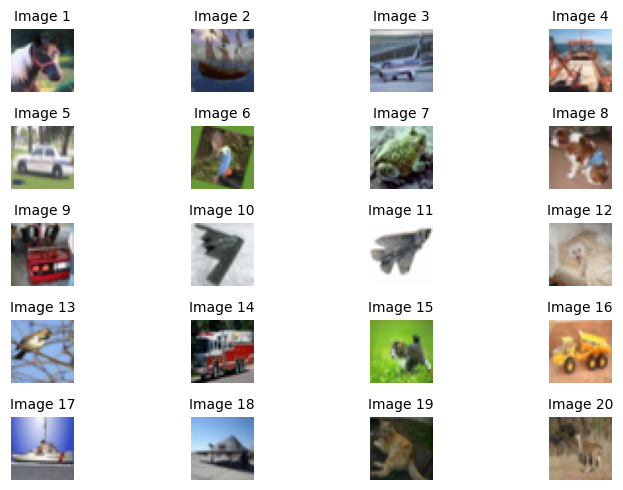

In [4]:
fig, axes = plt.subplots(5, 4, figsize=(8, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[random.randint(0, len(X_test) - 1)], cmap='gray')  
    ax.axis('off') 
    ax.set_title(f"Image {i+1}",size=10) 

plt.tight_layout()  
plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Dropout, LeakyReLU,Conv2D,Activation
from tensorflow.keras.utils import plot_model


In [6]:

def discriminator(input_shape=(32, 32, 3)):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding='same'))
    model.add(Activation('relu'))
    
    # Flatten and classify
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    return model


In [7]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

NameError: name 'hub' is not defined

In [ ]:
latent_dim = 512
def interpolate_between_vectors():
  v1 = tf.random.normal([latent_dim])
  v2 = tf.random.normal([latent_dim])

  # Creates a tensor with 25 steps of interpolation between v1 and v2.
  vectors = interpolate_hypersphere(v1, v2, 50)

  # Uses module to generate images from the latent space.
  interpolated_images = progan(vectors)['default']

  return interpolated_images

interpolated_images = interpolate_between_vectors()
animate(interpolated_images)


NameError: name 'interpolate_hypersphere' is not defined

In [ ]:
image_from_module_space = True  # @param { isTemplate:true, type:"boolean" }

def get_module_space_image():
  vector = tf.random.normal([1, latent_dim])
  images = progan(vector)['default'][0]
  return images

def upload_image():
  uploaded = files.upload()
  image = imageio.imread(uploaded[list(uploaded.keys())[0]])
  return transform.resize(image, [128, 128])

if image_from_module_space:
  target_image = get_module_space_image()
else:
  target_image = upload_image()

display_image(target_image)